# EDA - Logs d'Activité

Ce notebook présente une analyse exploratoire des logs d'activité (`logs_activite.csv`).
L'objectif est d'analyser la performance des centres, les types d'opérations, les incidents et l'efficacité des traitements.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Configuration du style des graphiques
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [4]:
# Chargement du dataset
df_logs = pd.read_csv('../../data_raw/logs_activite.csv')

# Affichage des premières lignes
df_logs.head()

,log_id,centre_id,date_operation,type_operation,type_document,nombre_traite,delai_effectif,nombre_rejete,raison_rejet,personnel_present,temps_attente_moyen_minutes,incident_technique,heure_debut,heure_fin
0,LOG001,CT015,2023-10-30,Traitement,Carte d'identité,241,41,31,Non éligible,15,58,Non,08:00,16:00
1,LOG002,CT026,2023-04-21,Maintenance,NaN,0,0,0,NaN,12,0,Non,09:00,19:00
2,LOG003,CT049,2023-08-22,Traitement,Livre de famille,62,19,0,NaN,12,95,Non,08:30,17:30
3,LOG004,CT047,2023-07-13,Traitement,Acte de naissance,139,22,12,Double demande,7,54,Non,08:15,16:15
4,LOG005,CT008,2023-04-08,Traitement,Passeport,71,35,6,Double demande,13,94,Oui,08:30,17:30


In [5]:
# Aperçu des données

print(df_logs.info())
display(df_logs.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   log_id                       450 non-null    object
 1   centre_id                    450 non-null    object
 2   date_operation               450 non-null    object
 3   type_operation               450 non-null    object
 4   type_document                370 non-null    object
 5   nombre_traite                450 non-null    int64 
 6   delai_effectif               450 non-null    int64 
 7   nombre_rejete                450 non-null    int64 
 8   raison_rejet                 347 non-null    object
 9   personnel_present            450 non-null    int64 
 10  temps_attente_moyen_minutes  450 non-null    int64 
 11  incident_technique           450 non-null    object
 12  heure_debut                  450 non-null    object
 13  heure_fin                    450 no

,nombre_traite,delai_effectif,nombre_rejete,personnel_present,temps_attente_moyen_minutes
count,450.000000,450.000000,450.000000,450.000000,450.000000
mean,85.553333,20.733333,6.464444,8.288889,52.024444
std,79.209502,14.390513,8.011119,4.016792,37.881739
min,0.000000,0.000000,0.000000,2.000000,0.000000
25%,30.250000,8.000000,1.000000,5.000000,18.250000
50%,66.000000,21.000000,4.000000,8.000000,48.500000
75%,100.000000,34.000000,8.000000,12.000000,86.000000
max,297.000000,45.000000,43.000000,15.000000,120.000000


## Vérification de la qualité des données

In [6]:
# Conversion des dates
df_logs['date_operation'] = pd.to_datetime(df_logs['date_operation'])

# Vérification des valeurs manquantes
missing_values = df_logs.isnull().sum()
print("Valeurs manquantes :\n", missing_values[missing_values > 0])

# Vérification des doublons
duplicates = df_logs.duplicated().sum()
print(f"\nNombre de doublons : {duplicates}")

Valeurs manquantes :
 type_document     80
raison_rejet     103
dtype: int64

Nombre de doublons : 0


In [5]:
#pourcentate de données manquantes
df_logs.isnull().sum() / len(df_logs) * 100



log_id                          0.000000
centre_id                       0.000000
date_operation                  0.000000
type_operation                  0.000000
type_document                  17.777778
nombre_traite                   0.000000
delai_effectif                  0.000000
nombre_rejete                   0.000000
raison_rejet                   22.888889
personnel_present               0.000000
temps_attente_moyen_minutes     0.000000
incident_technique              0.000000
heure_debut                     0.000000
heure_fin                       0.000000
dtype: float64

## Analyse Univariée

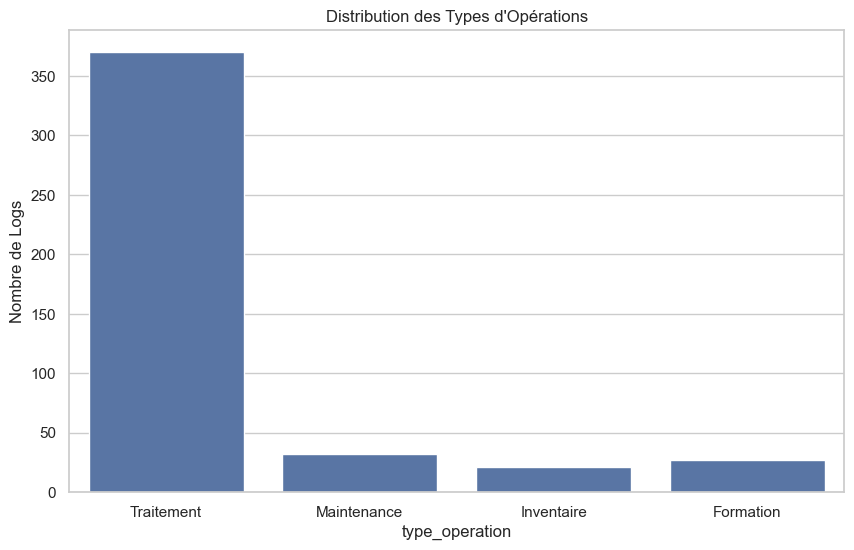

In [6]:
# Distribution des Types d'Opérations
plt.figure(figsize=(10, 6))
sns.countplot(x='type_operation', data=df_logs)
plt.title("Distribution des Types d'Opérations")
plt.ylabel('Nombre de Logs')
plt.show()

C:\Users\RIG\AppData\Local\Temp\ipykernel_13648\2755835803.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='incident_technique', data=df_logs, palette='pastel')


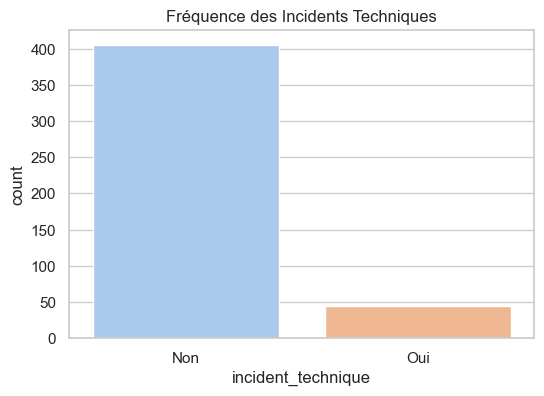

In [7]:
# Distribution des Incidents Techniques
plt.figure(figsize=(6, 4))
sns.countplot(x='incident_technique', data=df_logs, palette='pastel')
plt.title("Fréquence des Incidents Techniques")
plt.show()

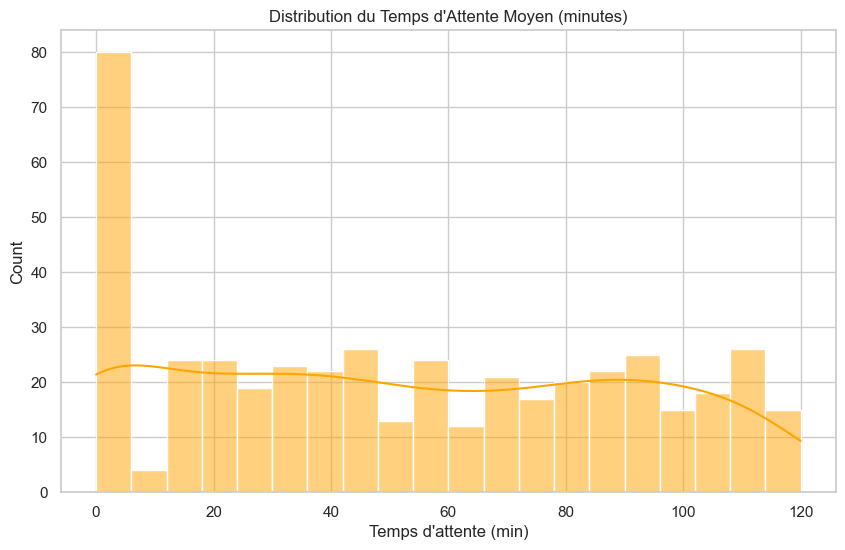

In [8]:
# Distribution du Temps d'Attente Moyen
plt.figure(figsize=(10, 6))
sns.histplot(df_logs['temps_attente_moyen_minutes'], kde=True, bins=20, color='orange')
plt.title("Distribution du Temps d'Attente Moyen (minutes)")
plt.xlabel('Temps d\'attente (min)')
plt.show()

## Analyse Bivariée et Temporelle

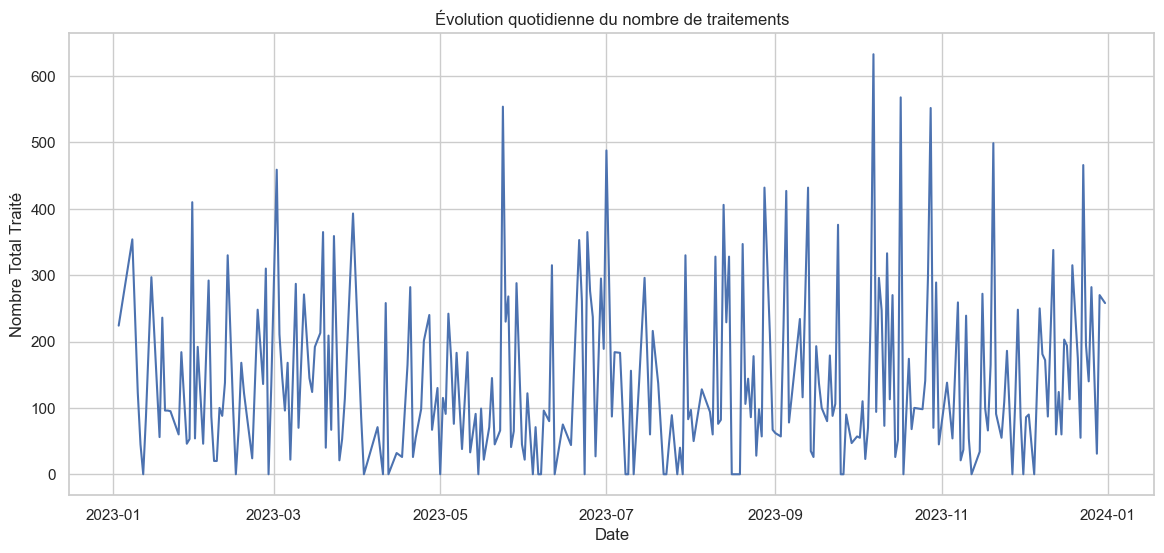

In [9]:
# Évolution du nombre traité dans le temps
logs_daily = df_logs.groupby('date_operation')['nombre_traite'].sum().reset_index()
plt.figure(figsize=(14, 6))
sns.lineplot(data=logs_daily, x='date_operation', y='nombre_traite')
plt.title("Évolution quotidienne du nombre de traitements")
plt.xlabel('Date')
plt.ylabel('Nombre Total Traité')
plt.show()

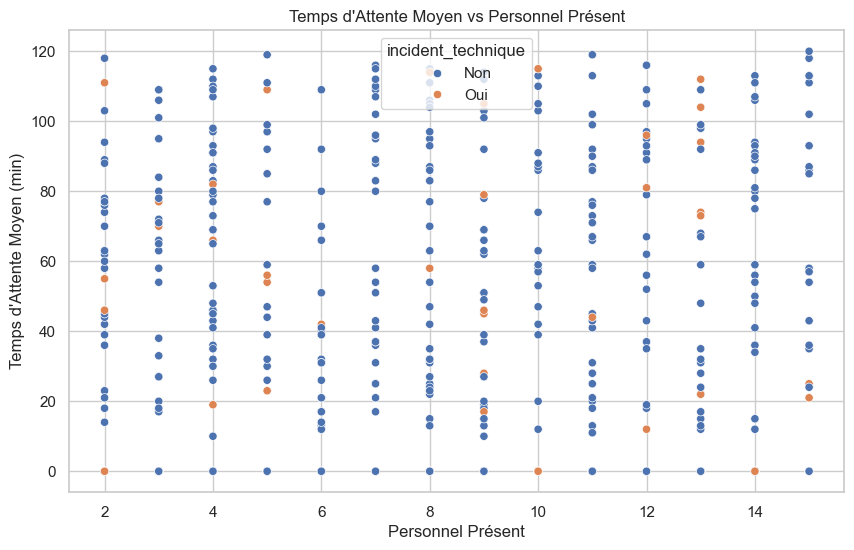

In [10]:
# Temps d'attente vs Personnel Présent
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_logs, x='personnel_present', y='temps_attente_moyen_minutes', hue='incident_technique')
plt.title("Temps d'Attente Moyen vs Personnel Présent")
plt.xlabel('Personnel Présent')
plt.ylabel("Temps d'Attente Moyen (min)")
plt.show()

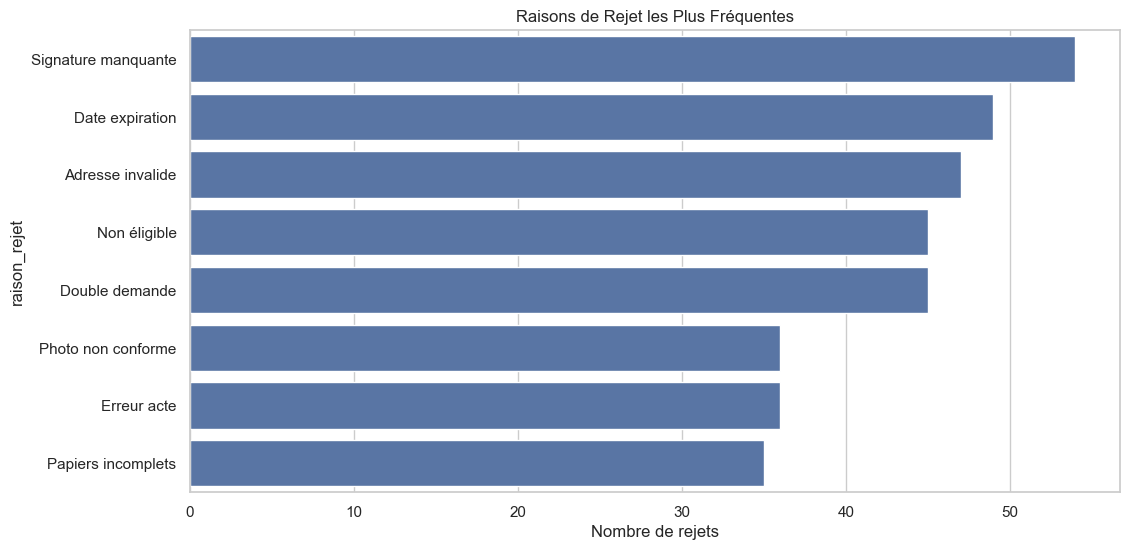

In [11]:
# Raisons des rejets (pour les opérations de traitement)
df_rejets = df_logs[df_logs['type_operation'] == 'Traitement']
plt.figure(figsize=(12, 6))
sns.countplot(y='raison_rejet', data=df_rejets, order=df_rejets['raison_rejet'].value_counts().index)
plt.title("Raisons de Rejet les Plus Fréquentes")
plt.xlabel('Nombre de rejets')
plt.show()

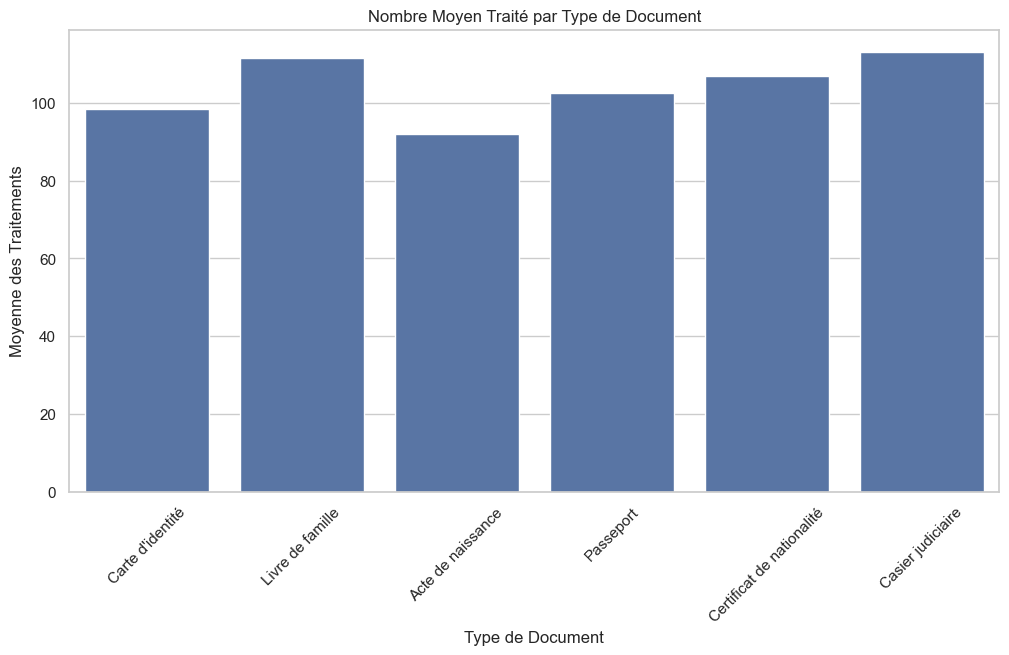

In [12]:
# Nombre moyen traité par Type de Document
plt.figure(figsize=(12, 6))
sns.barplot(data=df_logs[df_logs['type_document'] != 'N/A'], x='type_document', y='nombre_traite', estimator=np.mean, errorbar=None)
plt.title("Nombre Moyen Traité par Type de Document")
plt.xlabel("Type de Document")
plt.ylabel("Moyenne des Traitements")
plt.xticks(rotation=45)
plt.show()

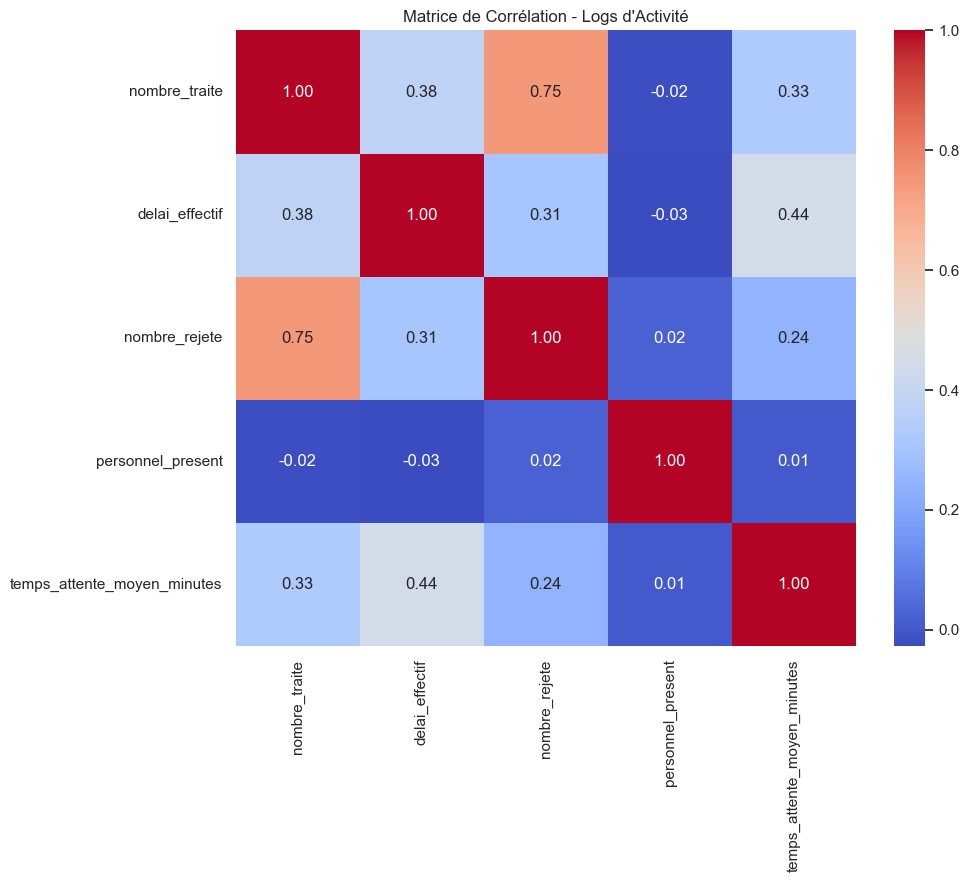

In [13]:
# Matrice de corrélation pour les logs
numeric_cols = df_logs.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(10, 8))
sns.heatmap(df_logs[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matrice de Corrélation - Logs d'Activité")
plt.show()

In [8]:
import os 
import sys

# 1. Ajout du chemin au système (doit être fait avant l'import du module local)
module_path = r"D:\public_services_optimization_togo\02_Nettoyage_et_Preparation_des_Donnees"
if module_path not in sys.path:
    sys.path.append(module_path)

from clean_logs_activite import clean_logs_activite
# get the cleaned logs activite
df_logs_cleaned = clean_logs_activite(df_logs)
# save to path 

df_logs_cleaned.to_csv(r"D:\public_services_optimization_togo\02_Nettoyage_et_Preparation_des_Donnees\data_cleaned\logs_activite_cleaned.csv", index=False)

